Imports Pandas and Matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator


This is the setup of the Data Loading to prepare for the data output.

In [3]:
file_path = "https://raw.githubusercontent.com/Joba19/DSCI-235-Project/main/DataSets/telework-tables-2023-11(V2).csv"

df = pd.read_csv(file_path, skiprows=5)

df.head()


,Age and sex,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"Total, 16 years and over","157,753","32,326","16,479","15,847","125,427",100.0,20.5,10.4,10.0,79.5
1,16 to 24 years,"19,857","1,190",576,614,"18,666",100.0,6.0,2.9,3.1,94.0
2,16 to 19 years,"5,366",84,17,67,"5,281",100.0,1.6,0.3,1.3,98.4
3,20 to 24 years,"14,491","1,106",559,547,"13,385",100.0,7.6,3.9,3.8,92.4
4,25 to 54 years,"101,297","23,283","12,214","11,069","78,014",100.0,23.0,12.1,10.9,77.0


So the data return is uncleaned so lets sort it out and reorganize the data.

In [4]:
df = pd.read_csv(file_path, skiprows=5)

# Rename columns
df.columns = [
    "Characteristic", "Total at work", "Telework Total", "Telework Some",
    "Telework All", "No Telework", "Pct Total at work", "Pct Telework Total",
    "Pct Telework Some", "Pct Telework All", "Pct No Telework"
]

# Clean data
df.dropna(subset=["Characteristic"], inplace=True)
df.reset_index(drop=True, inplace=True)

# Clean and convert Telework Total column
df["Telework Total"] = (
    df["Telework Total"]
    .str.strip()  # Remove whitespace
    .str.replace(",", "", regex=True)  # Remove commas
    .replace("", "0")  # Handle empty strings
    .fillna("0")  # Handle NaN
    .astype(int)  # Convert to integer
)

# Strip whitespace from Characteristic
df["Characteristic"] = df["Characteristic"].str.strip()

# Display cleaned data
df.head(10)

,Characteristic,Total at work,Telework Total,Telework Some,Telework All,No Telework,Pct Total at work,Pct Telework Total,Pct Telework Some,Pct Telework All,Pct No Telework
0,"Total, 16 years and over","157,753",32326,"16,479","15,847","125,427",100.0,20.5,10.4,10.0,79.5
1,16 to 24 years,"19,857",1190,576,614,"18,666",100.0,6.0,2.9,3.1,94.0
2,16 to 19 years,"5,366",84,17,67,"5,281",100.0,1.6,0.3,1.3,98.4
3,20 to 24 years,"14,491",1106,559,547,"13,385",100.0,7.6,3.9,3.8,92.4
4,25 to 54 years,"101,297",23283,"12,214","11,069","78,014",100.0,23.0,12.1,10.9,77.0
5,25 to 34 years,"34,904",7308,"3,843","3,465","27,596",100.0,20.9,11.0,9.9,79.1
6,35 to 44 years,"34,926",8586,"4,466","4,120","26,340",100.0,24.6,12.8,11.8,75.4
7,45 to 54 years,"31,467",7389,"3,905","3,484","24,078",100.0,23.5,12.4,11.1,76.5
8,55 years and over,"36,598",7852,"3,689","4,164","28,746",100.0,21.5,10.1,11.4,78.5
9,55 to 64 years,"25,912",5377,"2,668","2,709","20,535",100.0,20.8,10.3,10.5,79.2


This pie chart uses the most recent data I found to show how prevalent telework was in November 2023, after the COVID-19 pandemic.

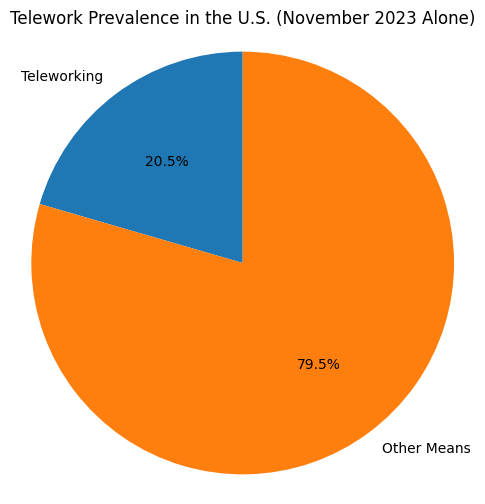

In [5]:
# Filter row for "Total, 16 years and over"
total_row = df[df["Characteristic"].str.contains("Total, 16 years and over", na=False)].iloc[0]

# Get telework and no telework values
telework_pct = total_row["Pct Telework Total"]
no_telework_pct = total_row["Pct No Telework"]

# Labels and values for the pie chart
labels = ["Teleworking", "Other Means"]
values = [telework_pct, no_telework_pct]

# Creates the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Telework Prevalence in the U.S. (November 2023 Alone)")
plt.axis('equal')
plt.show()

This bar chart shows the Most prevoent teleworkers biased on the age range

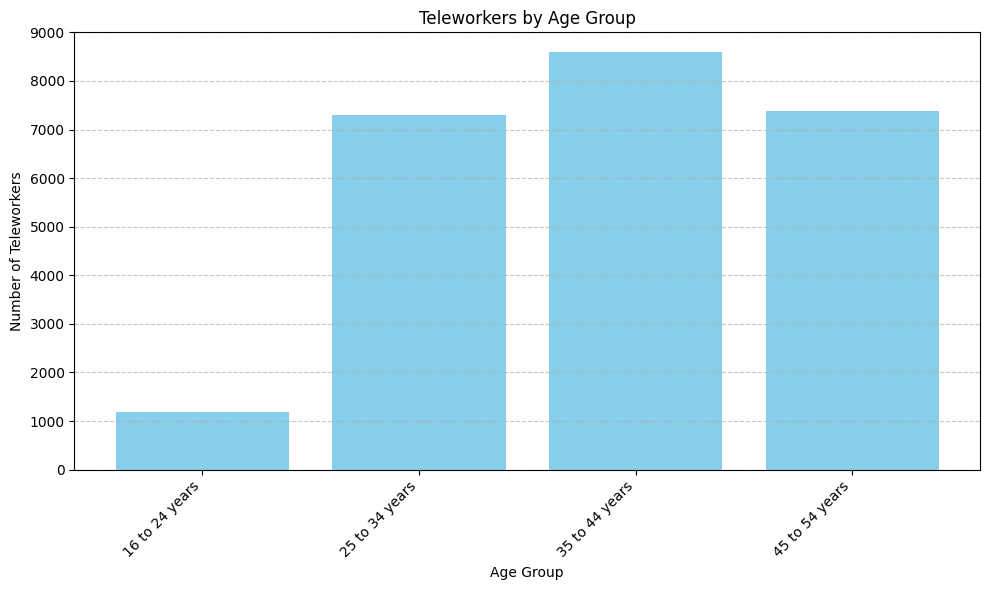

In [6]:
# Filter for first 8 rows
filtered_df = df.iloc[0:8].copy()

# Remove specific rows by value in the "Characteristic" column
exclude = ["Total, 16 years and over", "25 to 54 years", "16 to 19 years", "20 to 24 years"]
filtered_df = filtered_df[~filtered_df["Characteristic"].isin(exclude)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_df["Characteristic"], filtered_df["Telework Total"], color='skyblue')

# Format
plt.title("Teleworkers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Teleworkers")
plt.xticks(rotation=45, ha='right')

# Format y-axis
plt.yscale('linear')
plt.ylim(0, 9000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))

# Display
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This graph shows the most common age groups for people working from home. The most prevolent teleworkers range from 35 to 44 years old.